In [4]:
def relu(x):
    return np.maximum(0,x)

def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

In [14]:
instances = X_norm.shape[0]
attributes = X_norm.shape[1]
hidden_nodes1 = 8
hidden_nodes2 = 4
output_labels = 3

In [15]:
wh1 = np.random.randn(attributes,hidden_nodes1) * np.sqrt(2/attributes)
bh1 = np.zeros(shape=(1,hidden_nodes1),dtype=float)
wh2 = np.random.randn(hidden_nodes1, hidden_nodes2) * np.sqrt(2/hidden_nodes1)
bh2 = np.zeros(shape=(1, hidden_nodes2),dtype = float)

wo = np.random.randn(hidden_nodes2,output_labels) * np.sqrt(2/hidden_nodes2)
bo = np.zeros(shape=(1, output_labels),dtype=float)


error_cost = []

In [16]:
lr = 10e-4

In [17]:
def accuracy_train(y_pred,y_train):
    preds = np.argmax(y_pred,axis=1)
    true = np.argmax(y_train,axis=1)
    return (np.mean(preds == true) * 100)

In [18]:
def accuracy_test(x_norm,y_test):
    zh1 = np.dot(x_norm, wh1) + bh1
    ah1 = relu(zh1)
    zh2 = np.dot(ah1, wh2) + bh2
    ah2 = relu(zh2)
    # Phase 2
    zo = np.dot(ah2, wo) + bo
    ao_test = softmax(zo)
    preds_test = np.argmax(ao_test,axis=1)
    true_test = np.argmax(y_test,axis=1)
    acc_test = 0
    return (np.mean(preds_test == true_test) * 100)

In [19]:
vwo = np.zeros(shape=(wo.shape[0],wo.shape[1]))
swo = np.zeros(shape=(wo.shape[0],wo.shape[1]))
vbo = np.zeros(shape=(bo.shape[0],bo.shape[1]))
sbo = np.zeros(shape=(bo.shape[0],bo.shape[1]))
vw1 = np.zeros(shape=(wh1.shape[0],wh1.shape[1]))
sw1 = np.zeros(shape=(wh1.shape[0],wh1.shape[1]))
vb1 = np.zeros(shape=(bh1.shape[0],bh1.shape[1]))
sb1 = np.zeros(shape=(bh1.shape[0],bh1.shape[1]))
vw2 = np.zeros(shape=(wh2.shape[0],wh2.shape[1]))
sw2 = np.zeros(shape=(wh2.shape[0],wh2.shape[1]))
vb2 = np.zeros(shape=(bh2.shape[0],bh2.shape[1]))
sb2 = np.zeros(shape=(bh2.shape[0],bh2.shape[1]))
beta1 = 0.9
beta2 = 0.99
epsilon = 1e-4

In [20]:
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-7  # small value to avoid division by zero
    
    # Clip the predicted values to avoid log(0) and log(1) cases
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)
    
    # Compute binary cross entropy loss
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    return loss

In [22]:

for epoch in range(1,10001):
############# feedforward
    
    # Phase 1
    zh1 = np.dot(X_norm, wh1) + bh1
    ah1 = relu(zh1)
    zh2 = np.dot(ah1, wh2) + bh2
    ah2 = relu(zh2)
    # Phase 2
    zo = np.dot(ah2, wo) + bo
    ao = softmax(zo)

########## Back Propagation

########## Phase 1

    dcost_dzo = ao - Y_train
    dzo_dwo = ah2

    dcost_wo = 1./ instances * np.dot(dzo_dwo.T, dcost_dzo) + (0.7/instances) * wo
    

    dcost_bo = 1./ instances * np.sum(dcost_dzo,axis=0,keepdims=True)

    
        
    try:
        assert (dcost_wo.shape,dcost_bo.shape) == (wo.shape,bo.shape)
    except AssertionError:
        print("Check for the output layer")
        
    vwo = beta1 * vwo + (1-beta1)*dcost_wo
    swo = beta2 * swo + (1-beta2)*dcost_wo**2
    vbo = beta1 * vbo + (1-beta1)*dcost_bo
    sbo = beta2 * sbo + (1-beta2)*dcost_bo**2
    
    vwo_corrected = vwo/(1-beta1**epoch)
    vbo_corrected = vbo/(1-beta1**epoch)
    
    swo_corrected = swo/(1-beta2**epoch)
    sbo_corrected = sbo/(1-beta2**epoch)


########## Phases 2

######### Part 1
    dzo_dah2 = wo
    dcost_dah2 = np.dot(dcost_dzo , dzo_dah2.T)
    dah2_dzh2 = relu_derivative(zh2)
    dcost_dzh2 = np.multiply(dcost_dah2,dah2_dzh2)
    
    dcost_wh2 =  1. / instances * np.dot(ah1.T, dcost_dzh2 ) + (0.7/instances) * wh2
    dcost_bh2 = 1./instances * np.sum(dcost_dzh2, axis =0,keepdims=True ) 
            
    try:
        assert (dcost_wh2.shape,dcost_bh2.shape) == (wh2.shape,bh2.shape)
    except AssertionError:
        print("Check for the second hidden layer")
        
    vw2 = beta1 * vw2 + (1-beta1)*dcost_wh2
    sw2 = beta2 * sw2 + (1-beta2)*dcost_wh2**2
    vb2 = beta1 * vb2 + (1-beta1)*dcost_bh2
    sb2 = beta2 * sb2 + (1-beta2)*dcost_bh2**2
    
    vw2_corrected = vw2/(1-beta1**epoch)
    vb2_corrected = vb2/(1-beta1**epoch)
    
    sw2_corrected = sw2/(1-beta2**epoch)
    sb2_corrected = sb2/(1-beta2**epoch)
######### Part 2
    
    dz2_dah1 = wh2
    dcost_dah1 = np.dot(dcost_dzh2, dz2_dah1.T)
    dah1_dzh1 = relu_derivative(zh1)
    dcost_dzh1 = np.multiply(dcost_dah1,dah1_dzh1)
    
    dcost_wh1 = 1./ instances * np.dot(X_norm.T, dcost_dzh1 ) + (0.7/instances) * wh1
    dcost_bh1 = 1./ instances * np.sum(dcost_dzh1, axis = 0, keepdims = True)
                
    try:
        assert (dcost_wh1.shape,dcost_bh1.shape) == (wh1.shape,bh1.shape)
    except AssertionError:
        print("Check for the first hidden layer")
    
    vw1 = beta1 * vw1 + (1-beta1)*dcost_wh1
    sw1 = beta2 * sw1 + (1-beta2)*dcost_wh1**2
    vb1 = beta1 * vb1 + (1-beta1)*dcost_bh1
    sb1 = beta2 * sb1 + (1-beta2)*dcost_bh1**2
    
    vw1_corrected = vw1/(1-beta1**epoch)
    vb1_corrected = vb1/(1-beta1**epoch)
    
    sw1_corrected = sw1/(1-beta2**epoch)
    sb1_corrected = sb1/(1-beta2**epoch)

    # Update Weights ================

    wh2 -= lr * (vw2_corrected/(np.sqrt(sw2_corrected)+epsilon))
    bh2 -= lr * (vb2_corrected/(np.sqrt(sb2_corrected)+epsilon))
    
    wh1 -= lr * (vw1_corrected/(np.sqrt(sw1_corrected)+epsilon))
    bh1 -= lr * (vb1_corrected/(np.sqrt(sb1_corrected)+epsilon))
    

    wo -= lr * (vwo_corrected/(np.sqrt(swo_corrected)+epsilon))
    bo -= lr * (vbo_corrected/(np.sqrt(sbo_corrected)+epsilon))
    
    
    acc_train = accuracy_train(ao,Y_train)

    L2_regularization_cost = 0.7/(2*instances) *( np.sum(np.square(wh1))+ np.sum(np.square(wh2))+ np.sum(np.square(wo)) )


    if epoch % 200 == 0:
        loss = 1./ instances *  + L2_regularization_cost

        
        print('iteration: {}            loss: {:.6f}          training accuracy: {:.2f}'.format(epoch,loss,acc_train))
        error_cost.append(loss)

iteration: 200            loss: 0.000001          training accuracy: 57.44
iteration: 400            loss: 0.000001          training accuracy: 81.01
iteration: 600            loss: 0.000001          training accuracy: 91.22
iteration: 800            loss: 0.000001          training accuracy: 97.12
iteration: 1000            loss: 0.000001          training accuracy: 99.53
iteration: 1200            loss: 0.000001          training accuracy: 99.97
iteration: 1400            loss: 0.000001          training accuracy: 100.00
iteration: 1600            loss: 0.000002          training accuracy: 100.00
iteration: 1800            loss: 0.000002          training accuracy: 100.00
iteration: 2000            loss: 0.000002          training accuracy: 100.00
iteration: 2200            loss: 0.000002          training accuracy: 100.00
iteration: 2400            loss: 0.000002          training accuracy: 100.00
iteration: 2600            loss: 0.000002          training accuracy: 100.00
iteration

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

np.set_printoptions(precision=3, suppress=True)


In [6]:
train_data = pd.read_csv('train_motion_data.csv')

In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["Class"]
cat_cols_encoded = []
for col in cat_cols:
  cat_cols_encoded += [f"{col[0]}_{cat}" for cat in list(train_data[col].unique())]

cat_cols_encoded

['C_NORMAL', 'C_AGGRESSIVE', 'C_SLOW']

In [8]:
oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = oh_encoder.fit_transform(train_data[cat_cols])
train_data_enc = pd.DataFrame(encoded_cols, columns=cat_cols_encoded)
train_data_oh = train_data.join(train_data_enc)
train_data_oh = train_data_oh.drop('Class', 1)
train_data_oh

C:\Users\anish\AppData\Local\Temp\ipykernel_27152\72219164.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data_oh = train_data_oh.drop('Class', 1)


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp,C_NORMAL,C_AGGRESSIVE,C_SLOW
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,3581629,0.0,1.0,0.0
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,3581630,0.0,1.0,0.0
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,3581630,0.0,1.0,0.0
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,3581631,0.0,1.0,0.0
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,3581631,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,3583789,0.0,0.0,1.0
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,3583790,0.0,0.0,1.0
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,3583790,0.0,0.0,1.0
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,3583791,0.0,0.0,1.0


In [9]:
data = np.array(train_data_oh)
np.random.shuffle(data)
train_data = pd.DataFrame(data, columns = ['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Timestamp','C_NORMAL','C_AGGRESSIVE','C_SLOW'])

In [10]:
x_train = train_data.drop(['C_NORMAL','C_AGGRESSIVE','C_SLOW'],1)

C:\Users\anish\AppData\Local\Temp\ipykernel_27152\2113322769.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train = train_data.drop(['C_NORMAL','C_AGGRESSIVE','C_SLOW'],1)


In [11]:
y_train = train_data[['C_NORMAL','C_AGGRESSIVE','C_SLOW']]

In [12]:
X_train = np.array(x_train)
Y_train = np.array(y_train)

In [13]:
mu = np.mean(X_train, axis = 0)
sigma = np.std(X_train, axis = 0)
X_norm = (X_train - mu)/ sigma

In [23]:
zh1 = np.dot(X_norm, wh1) + bh1
ah1 = relu(zh1)
zh2 = np.dot(ah1, wh2) + bh2
ah2 = relu(zh2)
# Phase 2
zo = np.dot(ah2, wo) + bo
ao = softmax(zo)

In [24]:
print(ao)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [25]:
preds = np.argmax(ao,axis=1)

In [26]:
true = np.argmax(Y_train, axis=1)

In [27]:
acc = 0
for i,j in zip(true,preds):
    assert true.shape == preds.shape
    if i == j:
        acc += 1
print("training accuracy is {:.2f}%".format((acc/len(true))*100) )

training accuracy is 100.00%


In [28]:
test_data = pd.read_csv('test_motion_data.csv')
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["Class"]
cat_cols_encoded = []
for col in cat_cols:
  cat_cols_encoded += [f"{col[0]}_{cat}" for cat in list(test_data[col].unique())]

cat_cols_encoded


['C_AGGRESSIVE', 'C_NORMAL', 'C_SLOW']

In [29]:
oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = oh_encoder.fit_transform(test_data[cat_cols])
test_data_enc = pd.DataFrame(encoded_cols, columns=cat_cols_encoded)
test_data_oh = test_data.join(test_data_enc)
test_data_oh = test_data_oh.drop('Class', 1)
test_data_oh
test_data_oh[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Timestamp','C_NORMAL','C_AGGRESSIVE','C_SLOW']] = test_data_oh[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Timestamp','C_AGGRESSIVE','C_NORMAL','C_SLOW']]

C:\Users\anish\AppData\Local\Temp\ipykernel_27152\4181964957.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_data_oh = test_data_oh.drop('Class', 1)


In [30]:
data = np.array(test_data_oh)
np.random.shuffle(data)
test_data = pd.DataFrame(data, columns = ['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Timestamp','C_NORMAL','C_AGGRESSIVE','C_SLOW'])

In [31]:
x_test = test_data.drop(['C_NORMAL','C_AGGRESSIVE','C_SLOW'],1)
y_test = test_data[['C_NORMAL','C_AGGRESSIVE','C_SLOW']]

C:\Users\anish\AppData\Local\Temp\ipykernel_27152\905856510.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_test = test_data.drop(['C_NORMAL','C_AGGRESSIVE','C_SLOW'],1)


In [32]:
X_test = np.array(x_test)
Y_test = np.array(y_test)

In [33]:
mu = np.mean(X_test, axis = 0)
sigma = np.std(X_test, axis = 0)
x_norm = (X_test - mu)/ sigma

In [34]:
x_norm.shape

(3084, 7)

In [35]:
Y_test.shape

(3084, 3)

In [36]:
zh1 = np.dot(x_norm, wh1) + bh1
ah1 = relu(zh1)
zh2 = np.dot(ah1, wh2) + bh2
ah2 = relu(zh2)
# Phase 2
zo = np.dot(ah2, wo) + bo
ao_test = softmax(zo)

In [37]:
print(ao_test)
print(Y_train)

[[0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 ...
 [0.006 0.    0.994]
 [0.957 0.    0.043]
 [0.    1.    0.   ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [38]:
x = 0
for i in range(1):
    x += -(Y_train[i]*np.log(ao[i]))
    
print((ao[i][1]))

1.5726741820159504e-05


In [39]:
exp = ao_test.T

In [40]:
print(exp)

[[0.    1.    0.    ... 0.006 0.957 0.   ]
 [0.    0.    0.    ... 0.    0.    1.   ]
 [1.    0.    1.    ... 0.994 0.043 0.   ]]


In [41]:
exp_preds = np.argmax(exp,axis=0)

In [42]:
print(exp_preds)

[2 0 2 ... 2 0 1]


In [43]:
preds_test = np.argmax(ao_test,axis=1)
true_test = np.argmax(Y_test, axis=1)

In [44]:
print(preds_test)

[2 0 2 ... 2 0 1]


In [45]:
acc = 0
print('Testing Accuracy: %f'%(np.mean(preds_test == true_test) * 100)+'%')

Testing Accuracy: 92.477302%


In [47]:
Normal,Aggresive,Slow = 0 , 0, 0
for i in preds_test:
    if i == 0:
        Normal += 1
    elif i == 1:
        Aggresive += 1
    elif i == 2:
        Slow += 1

In [48]:
print("Number of predicted class 'Aggresive':  ",Aggresive)

Number of predicted class 'Aggresive':   951


In [49]:
normal,aggresive,slow = 0 , 0, 0
for i in true_test:
    if i == 0:
        normal += 1
    elif i == 1:
        aggresive += 1
    elif i == 2:
        slow += 1

In [50]:
print("Number of true class 'Aggresive':  ",aggresive)

Number of true class 'Aggresive':   814


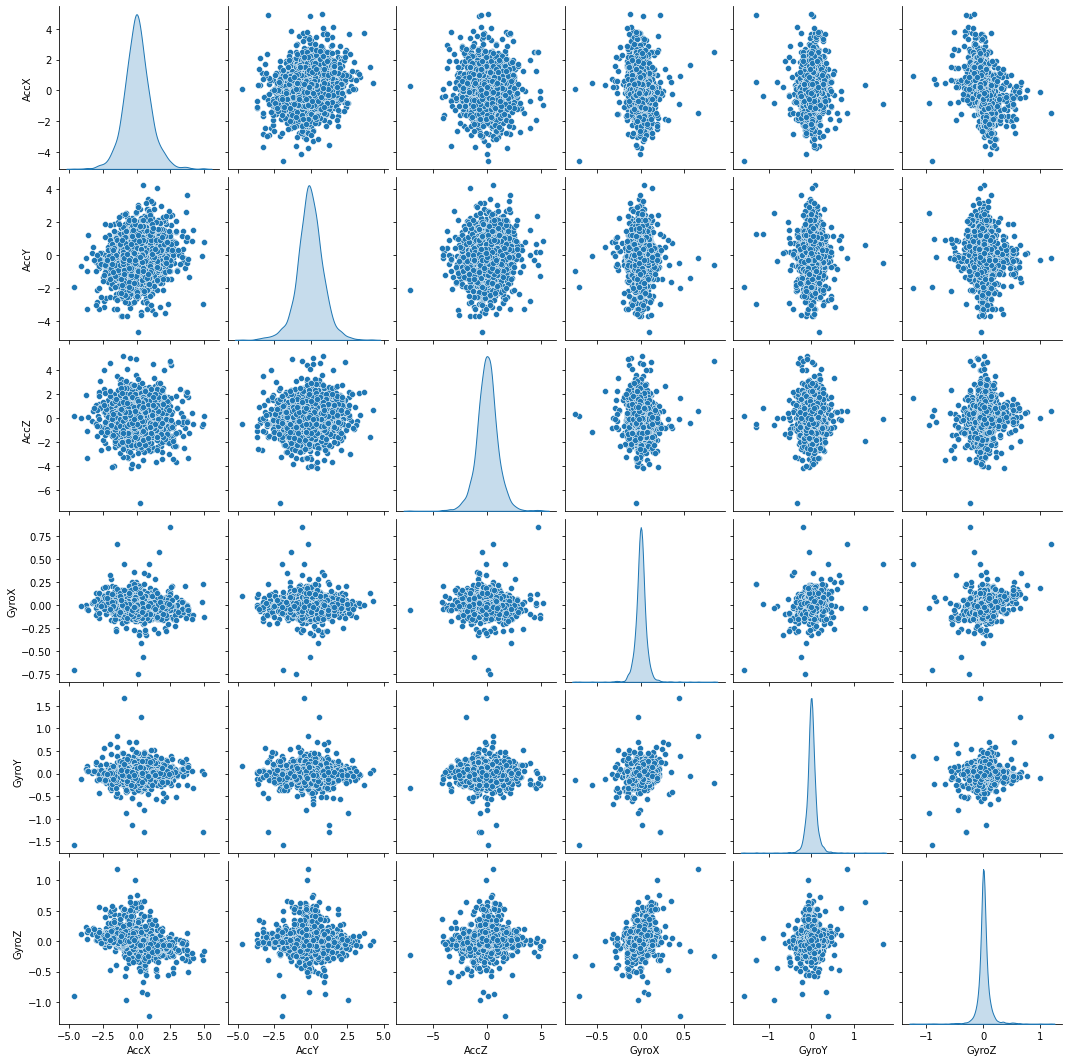

In [51]:
sns.pairplot(train_data[[ 'AccX','AccY','AccZ','GyroX','GyroY','GyroZ']], diag_kind='kde')